## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from keras.layers import Dropout


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], ratio: float=1e-8, drp_ratio: float=0.1):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(ratio))(x)
        x = Dropout(drp_ratio)(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2, 1e-3]
EPOCHS = 20
BATCH_SIZE_list = [128, 256]
Dropout_EXP = [0.1, 0.25]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from tensorflow.keras import optimizers

import itertools
for lr, BATCH_SIZE, drp_ratio in itertools.product(LEARNING_RATE, BATCH_SIZE_list, Dropout_EXP):
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    optimizer = optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = (f"lr: {lr}, BATCH_SIZE: {BATCH_SIZE}, drp_ratio: {drp_ratio}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                             

391/391 [==============================] - 9s 23ms/step - loss: 1.5619 - accuracy: 0.4416 - val_loss: 1.6815 - val_accuracy: 0.3842
Epoch 4/20
391/391 [==============================] - 10s 25ms/step - loss: 1.5064 - accuracy: 0.4626 - val_loss: 1.7825 - val_accuracy: 0.3662
Epoch 5/20
391/391 [==============================] - 10s 26ms/step - loss: 1.4668 - accuracy: 0.4773 - val_loss: 1.7656 - val_accuracy: 0.3843
Epoch 6/20
391/391 [==============================] - 9s 24ms/step - loss: 1.4218 - accuracy: 0.4923 - val_loss: 1.5835 - val_accuracy: 0.4376
Epoch 7/20
391/391 [==============================] - 11s 28ms/step - loss: 1.3899 - accuracy: 0.5032 - val_loss: 1.5817 - val_accuracy: 0.4338
Epoch 8/20
391/391 [==============================] - 9s 24ms/step - loss: 1.3621 - accuracy: 0.5144 - val_loss: 1.5146 - val_accuracy: 0.4551
Epoch 9/20
391/391 [==============================] - 9s 23ms/step - loss: 1.3368 - accuracy: 0.5228 - val_loss: 1.6167 - val_accuracy: 0.4358
Epoch 1

                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_10 (Bat  (None, 256)              1024      
 chNormali

391/391 [==============================] - 10s 25ms/step - loss: 1.2795 - accuracy: 0.5431 - val_loss: 1.6231 - val_accuracy: 0.4196
Epoch 6/20
391/391 [==============================] - 10s 25ms/step - loss: 1.2288 - accuracy: 0.5617 - val_loss: 1.5001 - val_accuracy: 0.4695
Epoch 7/20
391/391 [==============================] - 10s 25ms/step - loss: 1.1850 - accuracy: 0.5777 - val_loss: 1.7904 - val_accuracy: 0.4284
Epoch 8/20
391/391 [==============================] - 10s 25ms/step - loss: 1.1470 - accuracy: 0.5906 - val_loss: 1.5483 - val_accuracy: 0.4442
Epoch 9/20
391/391 [==============================] - 10s 25ms/step - loss: 1.1054 - accuracy: 0.6051 - val_loss: 1.4880 - val_accuracy: 0.4787
Epoch 10/20
391/391 [==============================] - 10s 25ms/step - loss: 1.0653 - accuracy: 0.6198 - val_loss: 1.4043 - val_accuracy: 0.5075
Epoch 11/20
391/391 [==============================] - 10s 25ms/step - loss: 1.0314 - accuracy: 0.6325 - val_loss: 1.5428 - val_accuracy: 0.4695
E

 batch_normalization_18 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
          

Epoch 8/20
196/196 [==============================] - 6s 31ms/step - loss: 1.3449 - accuracy: 0.5209 - val_loss: 1.4346 - val_accuracy: 0.4920
Epoch 9/20
196/196 [==============================] - 6s 30ms/step - loss: 1.3153 - accuracy: 0.5281 - val_loss: 1.7043 - val_accuracy: 0.4128
Epoch 10/20
196/196 [==============================] - 6s 29ms/step - loss: 1.2927 - accuracy: 0.5395 - val_loss: 1.7757 - val_accuracy: 0.3957
Epoch 11/20
196/196 [==============================] - 6s 29ms/step - loss: 1.2645 - accuracy: 0.5505 - val_loss: 1.5342 - val_accuracy: 0.4521
Epoch 12/20
196/196 [==============================] - 6s 29ms/step - loss: 1.2408 - accuracy: 0.5612 - val_loss: 1.4682 - val_accuracy: 0.4811
Epoch 13/20
196/196 [==============================] - 6s 29ms/step - loss: 1.2202 - accuracy: 0.5654 - val_loss: 1.4500 - val_accuracy: 0.4902
Epoch 14/20
196/196 [==============================] - 6s 29ms/step - loss: 1.1995 - accuracy: 0.5732 - val_loss: 1.4321 - val_accuracy: 0

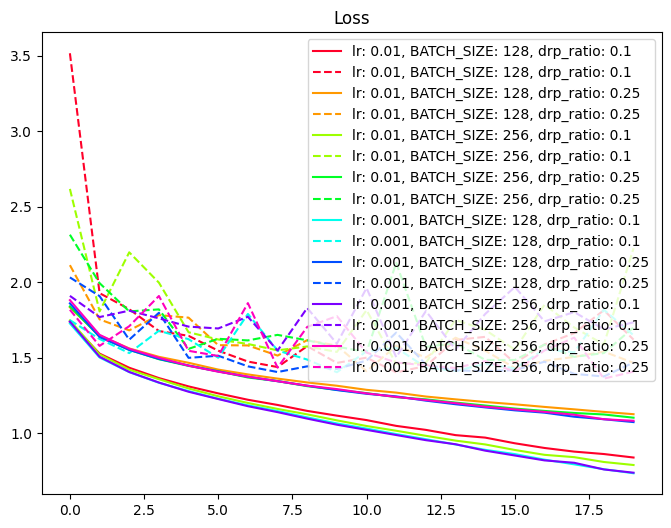

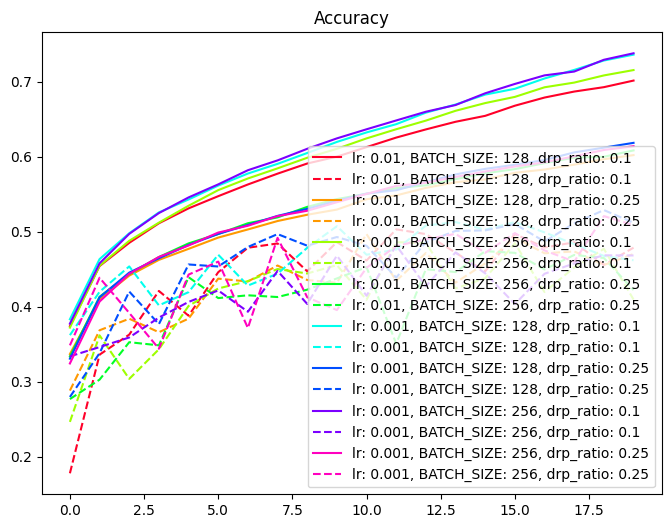

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
from matplotlib import cm as mplcm
from matplotlib import colors

NUM_COLORS = 8

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()